In [1]:
# Dependencies
import requests
import json

import pandas as pd
from pandas_datareader import data
from pandas_datareader import wb

import numpy as np

import time
import datetime as dt
from datetime import datetime

import matplotlib.pyplot as plt

import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem

import mplfinance as mpf

# Data Importing

## Financial Data Collection

Using the pandas DataReader library to request data from Yahoo Finance for the Cryptocurrencies and Stock Exchange information that will be sampled.

In [ ]:
#Bitcoin ticker symbol is BTC-USD
#Etheremum ticker symbol is ETH-USD
#Dogecoin ticker symbol is DOGE-USD
#Cardano ticker symbol is ADA-USD

#create a list of cryptocurrencies
crypto_list=["BTC-USD","ETH-USD","DOGE-USD","ADA-USD",]

#define date range
start_d = "2018-06-01"
end_d = "2020-06-30"

#create dataframe
crypto_list_df = data.DataReader(crypto_list, "yahoo", start_d,end_d)

#DOW JONES ticker symbol is ^DJI
#NASDAQ ticker symbol is ^IXIC

#create a list of Dow Jones and NASDAQ
stock_indexes_list =["^DJI","^IXIC"]

#create dataframe
stock_indexes_list_df = data.DataReader(stock_indexes_list, "yahoo", start_d,end_d)

## Social Media Data Collection

Read in previously called Reddit Comment Data.

In [2]:
bitcoin_comment_times = pd.read_csv('output/comments_bitcoin.csv', index_col = 0)
ethereum_comment_times = pd.read_csv('output/comments_ethereum.csv', index_col= 0)
cardano_comment_times = pd.read_csv('output/comments_cardano.csv', index_col= 0)
dogecoin_comment_times = pd.read_csv('output/comments_dogecoin.csv', index_col= 0)
nasdaq_comment_times = pd.read_csv('output/comments_nasdaq.csv', index_col= 0)
dow_comment_times = pd.read_csv('output/comments_dow.csv', index_col= 0)

C:\Users\12164\anaconda3\envs\PythonData\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


# Data Cleaning

## Financial

### Crypto Highs, Lows, and Volumes

In [ ]:
#filter out daily high rename columns
crypto_high = crypto_list_df.High.rename(columns={"BTC-USD": "Bitcoin High", "ETH-USD": "Ethereum High","DOGE-USD":"Dogecoin High", "ADA-USD":"Cardano High", "Symbols":"" })

#save to csv
crypto_high.to_csv("output/crypto_high.csv")

#multiple indexes making Date a series
crypto_high_no_date_index = crypto_high.reset_index()

#filter out daily low
crypto_low = crypto_list_df.Low.rename(columns={"BTC-USD": "Bitcoin Low", "ETH-USD": "Ethereum Low","DOGE-USD":"Dogecoin Low", "ADA-USD":"Cardano Low" })
#save to csv
crypto_low.to_csv("output/crypto_low.csv")

#multiple indexes making Date a series
crypto_low_no_date_index = crypto_low.reset_index()

#filter out daily volume
crypto_volume = crypto_list_df.Volume.rename(columns={"BTC-USD": "Bitcoin Volume", "ETH-USD": "Ethereum Volume","DOGE-USD":"Dogecoin Volume", "ADA-USD":"Cardano Volume" })
#save to csv
crypto_volume.to_csv("output/crypto_volume.csv")

#multiple indexes making Date a series
crypto_volume_no_date_index = crypto_volume.reset_index()




### Stock High, Lows, and Volumes

In [ ]:
#filter out daily high price
stock_indexes_list_high = stock_indexes_list_df.High.round(2).rename(columns={"^DJI": "Dow Jones High", "^IXIC":"NASDAQ High"})

#save to csv
stock_indexes_list_high.to_csv("output/stock_indexes_high.csv")

#filter out daily low
stock_indexes_list_low = stock_indexes_list_df.Low.round(2).rename(columns={"^DJI": "Dow Jones Low", "^IXIC":"NASDAQ Low"})

#save to csv
stock_indexes_list_low.to_csv("output/stock_indexes_low.csv")

#filter out daily volume
stock_indexes_list_volume = stock_indexes_list_df.Volume.rename(columns={"^DJI": "Dow Jones Volume", "^IXIC":"NASDAQ Volume"})

#save to csv
stock_indexes_list_volume.to_csv("output/stock_indexes_volume.csv")


## Social

In [3]:
bitcoin_comment_times['Exchange']= 'Bitcoin'
ethereum_comment_times['Exchange']= 'Ethereum'
cardano_comment_times['Exchange']= 'Cardano'
dogecoin_comment_times['Exchange']= 'Dogecoin'
nasdaq_comment_times['Exchange']= 'NASDAQ'
dow_comment_times['Exchange']= 'Dow Jones'

reddit_comments = pd.concat([bitcoin_comment_times, ethereum_comment_times, cardano_comment_times, dogecoin_comment_times, nasdaq_comment_times, dow_comment_times], ignore_index= True, keys = ('Bitcoin', 'Ethereum', 'Cardano', 'Dogecoin', 'NASDAQ', 'Dow Jones'))

reddit_comments['DateTime']= [datetime.fromtimestamp(i) for i in reddit_comments['Timestamp']]

reddit_comments['Date'] = reddit_comments['DateTime'].dt.date

reddit_comments_clean = reddit_comments[['Date', 'SubReddit', 'Exchange']]

df = pd.DataFrame(reddit_comments_clean.groupby(['Exchange', 'Date']).count()).reset_index()



,Timestamp,SubReddit,Exchange
0,1527825606,ethereum,Bitcoin
1,1527825642,btc,Bitcoin
2,1527825648,btc,Bitcoin
3,1527825725,btc,Bitcoin
4,1527825939,Sexsells,Bitcoin


In [12]:
#creat a list of cryptocurrencies
crypto_list=["BTC-USD","ETH-USD","DOGE-USD","ADA-USD",]

#define date range
start_d = "2018-06-01"
end_d = "2020-06-30"

#creat dataframe
crypto_list_df = data.DataReader(crypto_list, "yahoo", start_d,end_d)

#print to see structure
print(crypto_list_df)

Attributes    Adj Close                                        Close  \
Symbols         BTC-USD     ETH-USD  DOGE-USD   ADA-USD      BTC-USD   
Date                                                                   
2018-05-31  7541.450195  580.043030  0.003423  0.222507  7541.450195   
2018-06-01  7643.450195  591.807983  0.003558  0.227742  7643.450195   
2018-06-02  7720.250000  618.328979  0.003690  0.228154  7720.250000   
2018-06-03  7514.470215  592.984985  0.003532  0.214012  7514.470215   
2018-06-04  7633.759766  609.302979  0.003654  0.220467  7633.759766   
...                 ...         ...       ...       ...          ...   
2020-06-26  9045.390625  222.959793  0.002313  0.077679  9045.390625   
2020-06-27  9143.582031  225.347168  0.002326  0.080392  9143.582031   
2020-06-28  9190.854492  228.194870  0.002313  0.083870  9190.854492   
2020-06-29  9137.993164  226.315002  0.002320  0.083116  9137.993164   
2020-06-30  9228.325195  231.113419  0.002354  0.095954  9228.32

In [13]:
#filter out daily volume
crypto_volume = crypto_list_df.Volume.rename(columns={"BTC-USD": "Bitcoin Volume", "ETH-USD": "Etheremum Volume","DOGE-USD":"Dogecoin Volume", "ADA-USD":"Cardano Volume" })
#save to csv
#crypto_volume.to_csv("output/crypto_volume.csv")
#display
crypto_volume.head()

Symbols,Bitcoin Volume,Etheremum Volume,Dogecoin Volume,Cardano Volume
Date,,,,
2018-05-31,4.921460e+09,1.945890e+09,5436780.0,130538000.0
2018-06-01,4.939300e+09,1.880390e+09,5918490.0,116435000.0
2018-06-02,4.851760e+09,1.832550e+09,19570200.0,117208000.0
2018-06-03,4.993170e+09,1.903430e+09,22162200.0,115605000.0
2018-06-04,4.961740e+09,1.844270e+09,18819700.0,119846000.0


In [23]:
bit_volume = crypto_volume[['Bitcoin Volume']]
bit_volume.reset_index(inplace=True)

bit_comments = df.loc[df['Exchange']=='Bitcoin', ['Date', 'SubReddit']].rename(columns={"SubReddit":"Bitcoin Comments"})
bit_comments.reset_index()
bit_comments['Date'] = [i.strftime("%Y-%m-%d") for i in bit_comments['Date']]

bit_merged_df = pd.merge(bit_comments, bit_volume)

,Date,Bitcoin Volume
0,2018-05-31,4.921460e+09
1,2018-06-01,4.939300e+09
2,2018-06-02,4.851760e+09
3,2018-06-03,4.993170e+09
4,2018-06-04,4.961740e+09


In [26]:
bit_comments_merged = bit_merged_df['Bitcoin Comments']
bit_volume_merged = bit_merged_df['Bitcoin Volume']

correlation = st.pearsonr(bit_comments_merged, bit_volume_merged)

print(f"The correlation between Bitcoin Reddit Comments and the Bitcoin Volume in June 1, 2018 to June 30, 2020 is {correlation[0]}")

The correlation between Bitcoin Reddit Comments and the Bitcoin Volume in June 1, 2018 to June 30, 2020 is -0.07710875311706072


# Plots

### Cryptocurrency Daily Volume Over Time

In [ ]:
date_range = crypto_volume_no_date_index["Date"]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True,figsize=(17,10))
fig.suptitle("Daily Volume Over Time", fontsize=16, fontweight="bold")

ax1.plot(date_range, crypto_volume["Bitcoin Volume"], linewidth=1, color ="red")
ax1.set_ylabel("Bitcoin Volume")

ax2.plot(date_range, crypto_volume["Ethereum Volume"], linewidth=1, color ="blue")
ax2.set_ylabel("Ethereum Volume")

ax3.plot(date_range, crypto_volume["Dogecoin Volume"], linewidth=1,color ="green")
ax3.set_ylabel("Dogecoin Volume")

ax4.plot(date_range, crypto_volume["Cardano Volume"], linewidth=1, color ="purple")
ax4.set_ylabel("Cardano Volume")
ax4.set_xlabel("Date", fontsize=16, fontweight="bold")

#save plot
plt.savefig("output/crypto_volume.png")

plt.tight_layout()
plt.show()

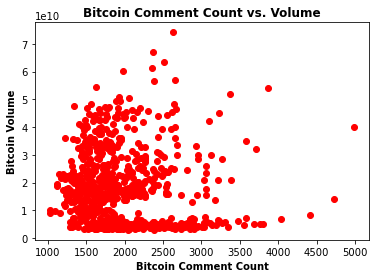

In [27]:
plt.scatter(bit_comments_merged, bit_volume_merged,color ="red")
plt.xlabel("Bitcoin Comment Count",fontweight="bold")
plt.ylabel("Bitcoin Volume",fontweight="bold")
plt.title("Bitcoin Comment Count vs. Volume",fontweight="bold")

#save plot
plt.savefig("output/bitcoin_scatter_volume.png")

plt.show()

The correlation between Bitcoin Reddit Comments and the Bitcoin change in Price in June 1, 2018 to June 30, 2020 is 0.3838310083141171


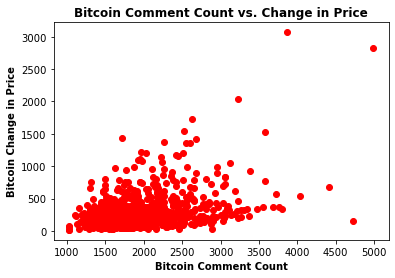

In [28]:
bit_difference = crypto_change[['Bitcoin Difference']]
bit_difference.reset_index(inplace=True)

bit_diff_merged = pd.merge(bit_comments, bit_difference)
bit_com = bit_diff_merged['Bitcoin Comments']
bit_diff = bit_diff_merged['Bitcoin Difference']

correlation = st.pearsonr(bit_com, bit_diff)

print(f"The correlation between Bitcoin Reddit Comments and the Bitcoin change in Price in June 1, 2018 to June 30, 2020 is {correlation[0]}")

plt.scatter(bit_com, bit_diff,color ="red")
plt.xlabel("Bitcoin Comment Count",fontweight="bold")
plt.ylabel("Bitcoin Change in Price",fontweight="bold")
plt.title("Bitcoin Comment Count vs. Change in Price",fontweight="bold")

#save plot
plt.savefig("output/bitcoin_scatter.png")

plt.show()

The correlation between Ethereum Reddit Comments and the Ethereum Volume in June 1, 2018 to June 30, 2020 is -0.4155885233514123


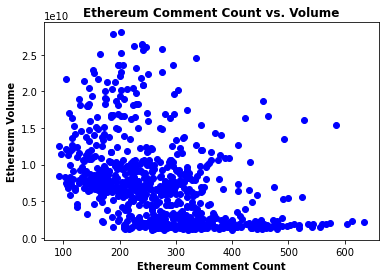

In [29]:
ether_comments = df.loc[df['Exchange']=='Ethereum', ['Date', 'SubReddit']]
ether_comments.reset_index()
ether_comments['Date'] = [i.strftime("%Y-%m-%d") for i in ether_comments['Date']]

ether_volume = crypto_volume[["Ethereum Volume"]]
ether_volume.reset_index(inplace=True)

ether_merged_df = pd.merge(ether_comments, ether_volume)
ether_comments_merged = ether_merged_df['SubReddit']
ether_volume_merged = ether_merged_df['Ethereum Volume']
correlation = st.pearsonr(ether_comments_merged, ether_volume_merged)

print(f"The correlation between Ethereum Reddit Comments and the Ethereum Volume in June 1, 2018 to June 30, 2020 is {correlation[0]}")

plt.scatter(ether_comments_merged, ether_volume_merged, color ="blue")
plt.xlabel("Ethereum Comment Count",fontweight="bold")
plt.ylabel("Ethereum Volume",fontweight="bold")
plt.title("Ethereum Comment Count vs. Volume",fontweight="bold")

#save plot
plt.savefig("output/ethereum_scatter_volume.png")

plt.show()

The correlation between Bitcoin Reddit Comments and the Bitcoin change in Price in June 1, 2018 to June 30, 2020 is 0.3875271313881695


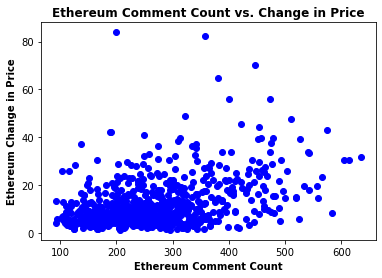

In [30]:
ether_difference = crypto_change[['Ethereum Difference']]
ether_difference.reset_index(inplace=True)

ether_diff_merged = pd.merge(ether_comments, ether_difference)
ether_com = ether_diff_merged['SubReddit']
ether_diff = ether_diff_merged['Ethereum Difference']

correlation = st.pearsonr(ether_com, ether_diff)

print(f"The correlation between Bitcoin Reddit Comments and the Bitcoin change in Price in June 1, 2018 to June 30, 2020 is {correlation[0]}")

plt.scatter(ether_com, ether_diff, color ="blue")
plt.xlabel("Ethereum Comment Count",fontweight="bold")
plt.ylabel("Ethereum Change in Price",fontweight="bold")
plt.title("Ethereum Comment Count vs. Change in Price",fontweight="bold")

#save plot
plt.savefig("output/ethereum_scatter.png")

plt.show()

The correlation between Cardano Reddit Comments and the Cardano Volume in June 1, 2018 to June 30, 2020 is 0.2845740181977755


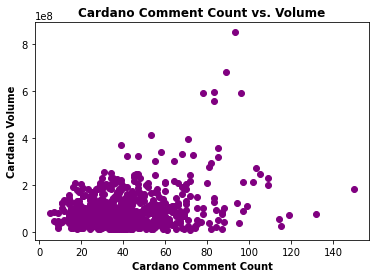

In [31]:
card_comments = df.loc[df['Exchange']=='Cardano', ['Date', 'SubReddit']]
card_comments.reset_index()
card_comments['Date'] = [i.strftime("%Y-%m-%d") for i in card_comments['Date']]
card_volume = crypto_volume[["Cardano Volume"]]
card_volume.reset_index(inplace=True)
card_merged_df = pd.merge(card_comments, card_volume)
card_comments_merged = card_merged_df['SubReddit']
card_volume_merged = card_merged_df['Cardano Volume']
correlation = st.pearsonr(card_comments_merged, card_volume_merged)

print(f"The correlation between Cardano Reddit Comments and the Cardano Volume in June 1, 2018 to June 30, 2020 is {correlation[0]}")
plt.scatter(card_comments_merged, card_volume_merged, color ="purple")
plt.xlabel("Cardano Comment Count",fontweight="bold")
plt.ylabel("Cardano Volume",fontweight="bold")
plt.title("Cardano Comment Count vs. Volume",fontweight="bold")

#save plot
plt.savefig("output/cardano_scatter_volume.png")

plt.show()

The correlation between Cardano Reddit Comments and the Cardano change in Price in June 1, 2018 to June 30, 2020 is 0.2580703448408521


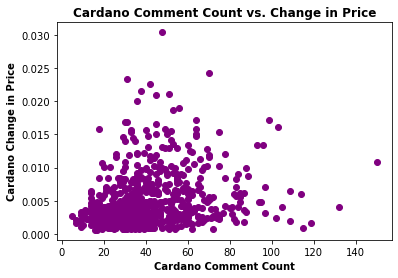

In [32]:
card_difference = crypto_change[['Cardano Difference']]
card_difference.reset_index(inplace=True)

card_diff_merged = pd.merge(card_comments, card_difference)
card_com = card_diff_merged['SubReddit']
card_diff = card_diff_merged['Cardano Difference']

correlation = st.pearsonr(card_com, card_diff)

print(f"The correlation between Cardano Reddit Comments and the Cardano change in Price in June 1, 2018 to June 30, 2020 is {correlation[0]}")

plt.scatter(card_com, card_diff,color ="purple")
plt.xlabel("Cardano Comment Count",fontweight="bold")
plt.ylabel("Cardano Change in Price",fontweight="bold")
plt.title("Cardano Comment Count vs. Change in Price",fontweight="bold")

#save plot
plt.savefig("output/cardano_scatter.png")

plt.show()

The correlation between Dogecoin Reddit Comments and the Dogecoin Volume in June 1, 2018 to June 30, 2020 is -0.1598712877065133


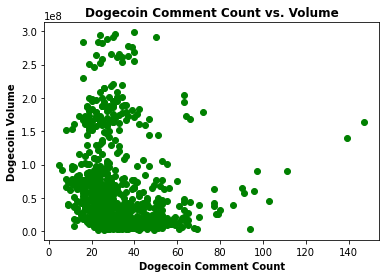

In [46]:
doge_comments = df.loc[df['Exchange']=='Dogecoin', ['Date', 'SubReddit']]
doge_comments.reset_index()
doge_comments['Date'] = [i.strftime("%Y-%m-%d") for i in doge_comments['Date']]
doge_volume = crypto_volume[["Dogecoin Volume"]]
doge_volume.reset_index(inplace=True)
doge_merged_df = pd.merge(doge_comments, doge_volume)
doge_comments_merged = doge_merged_df['SubReddit']
doge_volume_merged = doge_merged_df['Dogecoin Volume']
correlation = st.pearsonr(doge_comments_merged, doge_volume_merged)

print(f"The correlation between Dogecoin Reddit Comments and the Dogecoin Volume in June 1, 2018 to June 30, 2020 is {correlation[0]}")
plt.scatter(doge_comments_merged, doge_volume_merged,color ="green")
plt.xlabel("Dogecoin Comment Count",fontweight="bold")
plt.ylabel("Dogecoin Volume",fontweight="bold")
plt.title("Dogecoin Comment Count vs. Volume",fontweight="bold")

#save plot
plt.savefig("output/dogecoin_scatter_volume.png")

plt.show()

The correlation between Dogecoin Reddit Comments and the Dogecoin change in Price in June 1, 2018 to June 30, 2020 is 0.4618681910462514


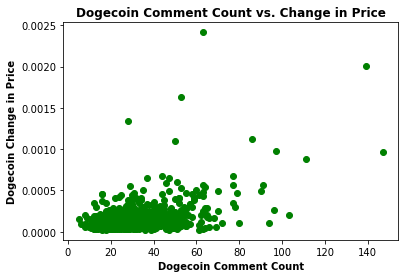

In [47]:
doge_difference = crypto_change[['Dogecoin Difference']]
doge_difference.reset_index(inplace=True)

doge_diff_merged = pd.merge(doge_comments, doge_difference)
doge_com = doge_diff_merged['SubReddit']
doge_diff = doge_diff_merged['Dogecoin Difference']

correlation = st.pearsonr(doge_com, doge_diff)

print(f"The correlation between Dogecoin Reddit Comments and the Dogecoin change in Price in June 1, 2018 to June 30, 2020 is {correlation[0]}")

plt.scatter(doge_com, doge_diff,color ="green")
plt.xlabel("Dogecoin Comment Count",fontweight="bold")
plt.ylabel("Dogecoin Change in Price",fontweight="bold")
plt.title("Dogecoin Comment Count vs. Change in Price",fontweight="bold")

#save plot
plt.savefig("output/dogecoin_scatter.png")

plt.show()

In [35]:
stock_indexes_list_volume = pd.read_csv("output/stock_indexes_volume.csv", index_col= 0)
stock_indexes_high = pd.read_csv("output/stock_indexes_high.csv", index_col= 0)
stock_indexes_low = pd.read_csv("output/stock_indexes_low.csv", index_col= 0)

stock_change = pd.merge(stock_indexes_high, stock_indexes_low, on = 'Date')

stock_change['Dow Jones Difference'] = stock_change['Dow Jones High'] - stock_change['Dow Jones Low']
stock_change['NASDAQ Difference'] = stock_change['NASDAQ High'] - stock_change['NASDAQ Low']

stock_change

,Dow Jones High,NASDAQ High,Dow Jones Low,NASDAQ Low,Dow Jones Difference,NASDAQ Difference
Date,,,,,,
2018-06-01,24673.60,7557.38,24542.09,7487.23,131.51,70.15
2018-06-04,24859.37,7607.17,24722.14,7561.20,137.23,45.97
2018-06-05,24838.78,7644.48,24710.82,7602.38,127.96,42.10
2018-06-06,25146.46,7691.65,24854.14,7622.31,292.32,69.34
2018-06-07,25326.09,7697.41,25164.48,7597.66,161.61,99.75
...,...,...,...,...,...,...
2020-06-24,25992.96,10137.50,25296.73,9842.22,696.23,295.28
2020-06-25,25769.61,10023.28,25209.79,9810.47,559.82,212.81
2020-06-26,25641.69,10000.67,24971.03,9749.07,670.66,251.60


The correlation between NASDAQ Reddit Comments and the NASDAQ Volume in June 1, 2018 to June 30, 2020 is 0.7394253806748537


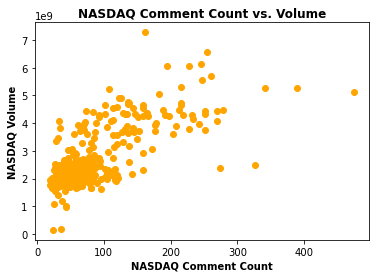

In [36]:
nasdaq_comments = df.loc[df['Exchange']=='NASDAQ', ['Date', 'SubReddit']]
nasdaq_comments.reset_index()
nasdaq_comments['Date'] = [i.strftime("%Y-%m-%d") for i in nasdaq_comments['Date']]
nasdaq_volume = stock_indexes_list_volume[['NASDAQ Volume']]
nasdaq_volume.reset_index(inplace=True)
nasdaq_merged_df = pd.merge(nasdaq_comments, nasdaq_volume)
nasdaq_comments_merged = nasdaq_merged_df['SubReddit']
nasdaq_volume_merged = nasdaq_merged_df['NASDAQ Volume']
correlation = st.pearsonr(nasdaq_comments_merged, nasdaq_volume_merged)

print(f"The correlation between NASDAQ Reddit Comments and the NASDAQ Volume in June 1, 2018 to June 30, 2020 is {correlation[0]}")
plt.scatter(nasdaq_comments_merged, nasdaq_volume_merged,color ="orange")
plt.xlabel("NASDAQ Comment Count",fontweight="bold")
plt.ylabel("NASDAQ Volume",fontweight="bold")
plt.title("NASDAQ Comment Count vs. Volume",fontweight="bold")

#save plot
plt.savefig("output/nasdaq_scatter_volume.png")

plt.show()

The correlation between NASDAQ Reddit Comments and the NASDAQ change in Price in June 1, 2018 to June 30, 2020 is 0.4263275477851225


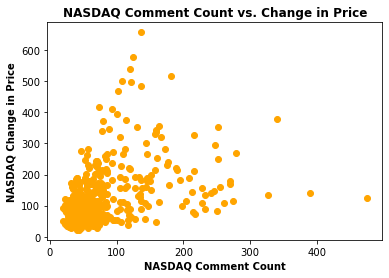

In [37]:
nasdaq_difference = stock_change[['NASDAQ Difference']]
nasdaq_difference.reset_index(inplace=True)

nasdaq_diff_merged = pd.merge(nasdaq_comments, nasdaq_difference)
nasdaq_com = nasdaq_diff_merged['SubReddit']
nasdaq_diff = nasdaq_diff_merged['NASDAQ Difference']

correlation = st.pearsonr(nasdaq_com, nasdaq_diff)

print(f"The correlation between NASDAQ Reddit Comments and the NASDAQ change in Price in June 1, 2018 to June 30, 2020 is {correlation[0]}")

plt.scatter(nasdaq_com, nasdaq_diff,color ="orange")
plt.xlabel("NASDAQ Comment Count",fontweight="bold")
plt.ylabel("NASDAQ Change in Price",fontweight="bold")
plt.title("NASDAQ Comment Count vs. Change in Price",fontweight="bold")

#save plot
plt.savefig("output/nasdaq_scatter.png")

plt.show()

The correlation between Dow Comments and the Dow Jones in June 1, 2018 to June 30, 2020 is 0.7775113642547149


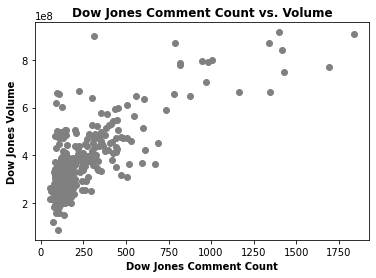

In [38]:
dow_volume = stock_indexes_list_volume[['Dow Jones Volume']]
dow_volume.reset_index(inplace=True)
dow_comments = df.loc[df['Exchange']=='Dow Jones', ['Date', 'SubReddit']]
dow_comments.reset_index()
dow_comments['Date'] = [i.strftime("%Y-%m-%d") for i in dow_comments['Date']]
dow_merged_df = pd.merge(dow_comments, dow_volume)
dow_comments_merged = dow_merged_df['SubReddit']
dow_volume_merged = dow_merged_df['Dow Jones Volume']
correlation = st.pearsonr(dow_comments_merged, dow_volume_merged)

print(f"The correlation between Dow Comments and the Dow Jones in June 1, 2018 to June 30, 2020 is {correlation[0]}")
plt.scatter(dow_comments_merged, dow_volume_merged,color ="gray")
plt.xlabel("Dow Jones Comment Count",fontweight="bold")
plt.ylabel("Dow Jones Volume",fontweight="bold")
plt.title("Dow Jones Comment Count vs. Volume",fontweight="bold")

#save plot
plt.savefig("output/dow_scatter_volume.png")

plt.show()

The correlation between Dow Jones Reddit Comments and the Dow Jones change in Price in June 1, 2018 to June 30, 2020 is 0.8208300478702695


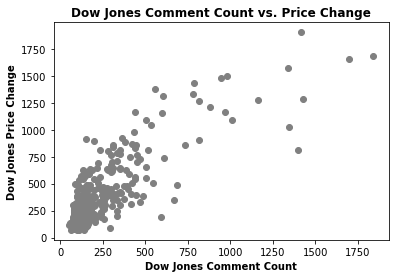

In [39]:
dow_difference = stock_change[['Dow Jones Difference']]
dow_difference.reset_index(inplace=True)

dow_diff_merged = pd.merge(dow_comments, dow_difference)
dow_com = dow_diff_merged['SubReddit']
dow_diff = dow_diff_merged['Dow Jones Difference']

correlation = st.pearsonr(dow_com, dow_diff)

print(f"The correlation between Dow Jones Reddit Comments and the Dow Jones change in Price in June 1, 2018 to June 30, 2020 is {correlation[0]}")

plt.scatter(dow_com, dow_diff, color ="gray")
plt.xlabel("Dow Jones Comment Count",fontweight="bold")
plt.ylabel("Dow Jones Price Change",fontweight="bold")
plt.title("Dow Jones Comment Count vs. Price Change",fontweight="bold")

#save plot
plt.savefig("output/dow_scatter.png")

plt.show()

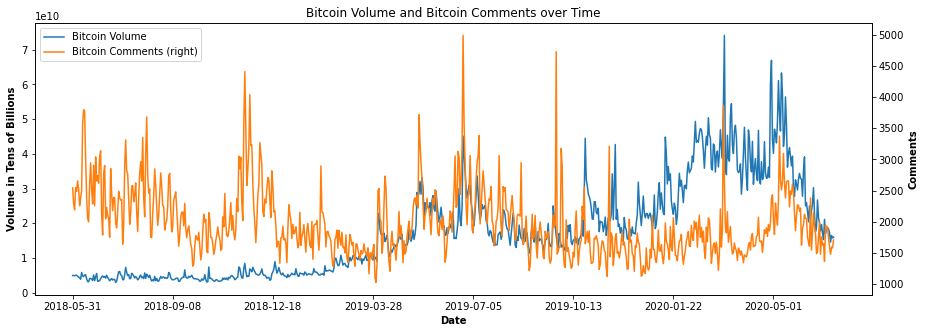

In [40]:
bitcoin_comment_vs_volume = crypto_volume[['Bitcoin Volume']].plot()

bit_comments.plot(ax = bitcoin_comment_vs_volume, secondary_y = True,figsize=(15,5),title = "Bitcoin Volume and Bitcoin Comments over Time").set_ylabel("Comments",fontweight="bold")

bitcoin_comment_vs_volume.set_xlabel("Date",fontweight="bold")
bitcoin_comment_vs_volume.set_ylabel("Volume in Tens of Billions",fontweight="bold")


#save plot
plt.savefig("output/bitcoin_volume_and_comments.png")

plt.show()

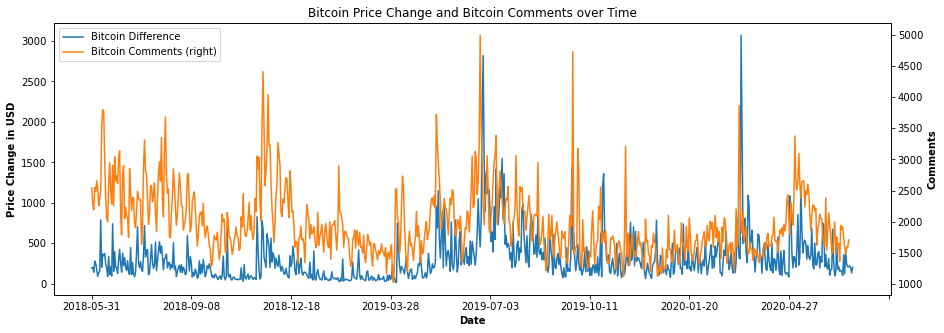

In [41]:
bitcoin_comment_vs_price = crypto_change[['Bitcoin Difference']].plot()

bit_comments.plot(ax = bitcoin_comment_vs_price, secondary_y = True,figsize=(15,5),title = "Bitcoin Price Change and Bitcoin Comments over Time").set_ylabel("Comments",fontweight="bold")

bitcoin_comment_vs_price.set_xlabel("Date",fontweight="bold")
bitcoin_comment_vs_price.set_ylabel("Price Change in USD",fontweight="bold")


#save plot
plt.savefig("output/bitcoin_price_change_and_comments.png")

plt.show()

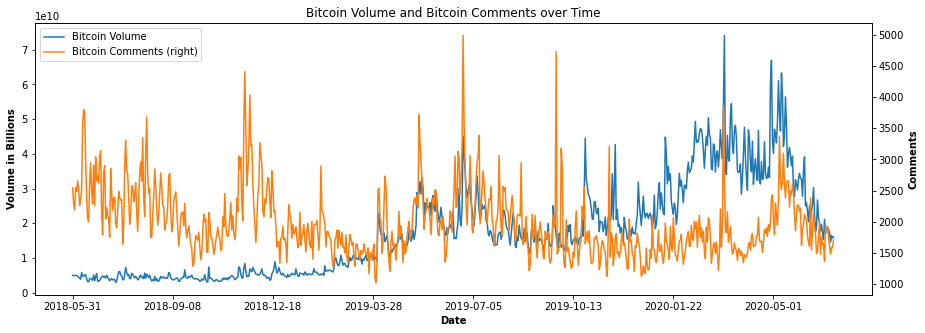

In [42]:
bitcoin_comment_vs_volume = crypto_volume[['Bitcoin Volume']].plot()

bit_comments.plot(ax = bitcoin_comment_vs_volume, secondary_y = True,figsize=(15,5),title = "Bitcoin Volume and Bitcoin Comments over Time").set_ylabel("Comments",fontweight="bold")

bitcoin_comment_vs_volume.set_xlabel("Date",fontweight="bold")
bitcoin_comment_vs_volume.set_ylabel("Volume in Billions",fontweight="bold")


#save plot
plt.savefig("output/bitcoin_volume_and_comments.png")

plt.show()

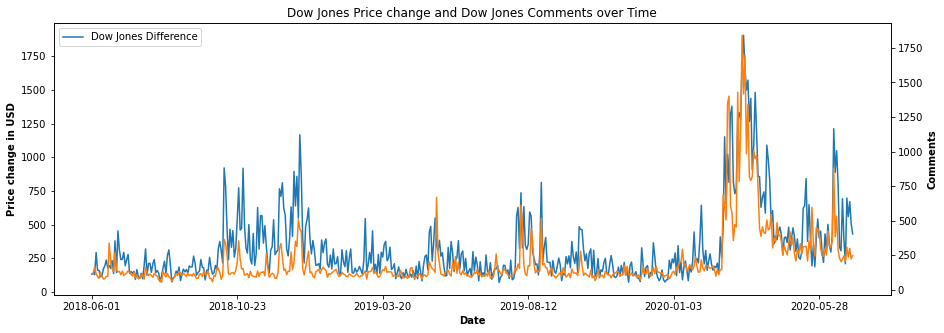

In [43]:
dow_comment_vs_price_change = stock_change[['Dow Jones Difference']].plot()

dow_diff_merged['SubReddit'].plot(ax = dow_comment_vs_price_change, secondary_y = True,figsize=(15,5),title = "Dow Jones Price change and Dow Jones Comments over Time").set_ylabel("Comments",fontweight="bold")

dow_comment_vs_price_change.set_xlabel("Date",fontweight="bold")
dow_comment_vs_price_change.set_ylabel("Price change in USD",fontweight="bold")


#save plot
plt.savefig("output/dow_price_change_and_comments.png")

plt.show()

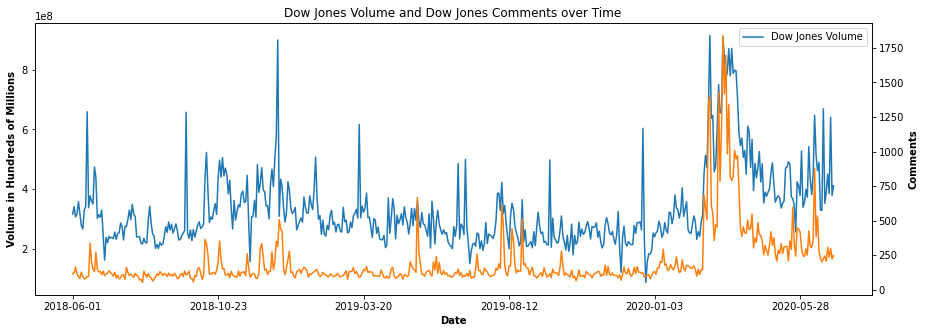

In [44]:
dow_comment_vs_volume = stock_indexes_list_volume[['Dow Jones Volume']].plot()

dow_diff_merged['SubReddit'].plot(ax = dow_comment_vs_volume, secondary_y = True,figsize=(15,5),title = "Dow Jones Volume and Dow Jones Comments over Time").set_ylabel("Comments",fontweight="bold")

dow_comment_vs_volume.set_xlabel("Date",fontweight="bold")
dow_comment_vs_volume.set_ylabel("Volume in Hundreds of Millions",fontweight="bold")


#save plot
plt.savefig("output/dow_volume_and_comments.png")

plt.show()